In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

In [158]:
data = pd.read_csv("NIFTY 50.csv", parse_dates = ["Date"], index_col = "Date")
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5353 entries, 2000-01-03 to 2021-07-07
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5353 non-null   float64
 1   High       5353 non-null   float64
 2   Low        5353 non-null   float64
 3   Close      5353 non-null   float64
 4   Volume     5353 non-null   int64  
 5   Turnover   5353 non-null   float64
 6   P/E        5353 non-null   float64
 7   P/B        5353 non-null   float64
 8   Div Yield  5353 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 418.2 KB


In [159]:
df = pd.DataFrame(data, columns=['Close'])
#df = df.reset_index()
df["Return"] = df.Close.pct_change()
df.dropna(inplace = True)
df

,Close,Return
Date,,
2000-01-04,1638.70,0.029205
2000-01-05,1595.80,-0.026179
2000-01-06,1617.60,0.013661
2000-01-07,1613.30,-0.002658
2000-01-10,1632.95,0.012180
...,...,...
2021-07-01,15680.00,-0.002640
2021-07-02,15722.20,0.002691
2021-07-05,15834.35,0.007133


In [160]:
df.Close.rolling(window = 50).mean()

Date
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
2000-01-10          NaN
                ...    
2021-07-01    15275.350
2021-07-02    15301.671
2021-07-05    15331.531
2021-07-06    15358.196
2021-07-07    15382.728
Name: Close, Length: 5352, dtype: float64

In [161]:
df["SMA50"] = df.Close.rolling(window = 50).mean()

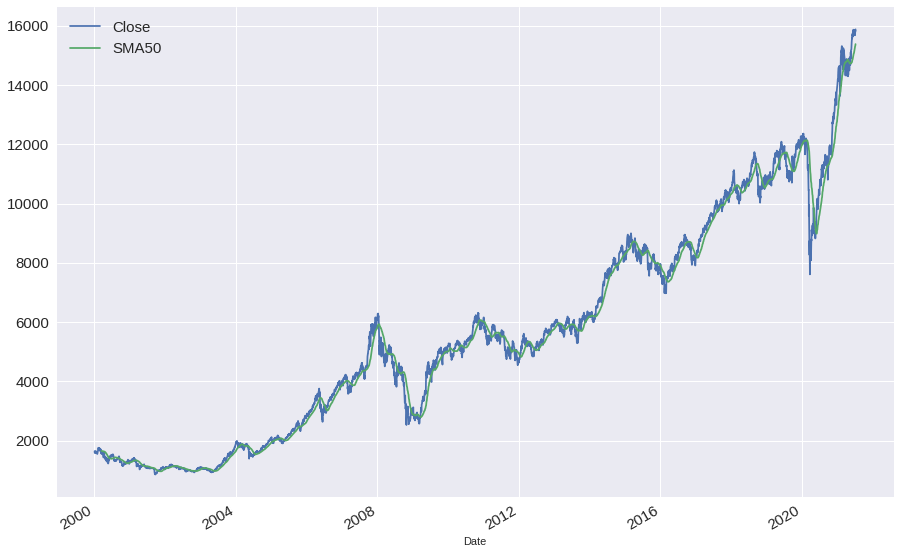

In [162]:
df[["Close", "SMA50"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [163]:
df["SMA200"] = df.Close.rolling(window = 200).mean()

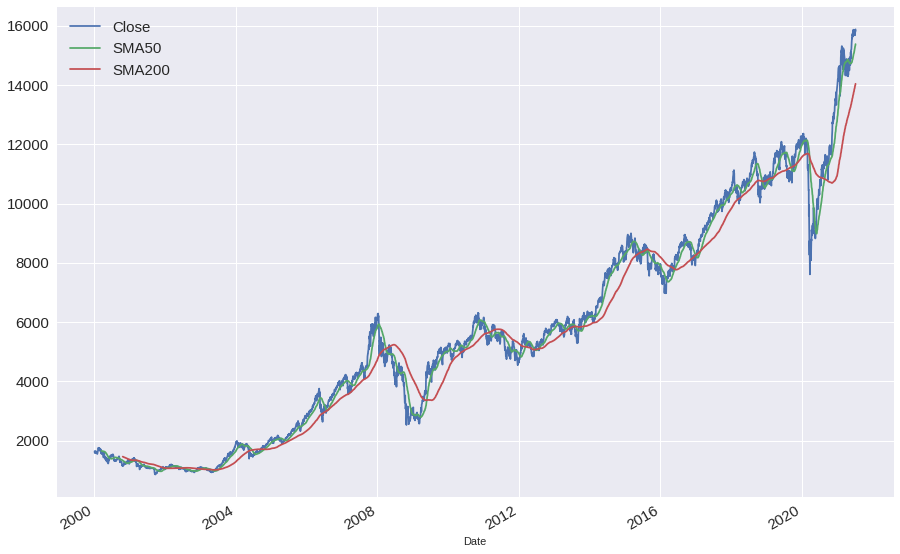

In [164]:
df[["Close", "SMA50", "SMA200"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [165]:
df.dropna(inplace = True)
df["Position"] = np.sign(df.SMA50.sub(df.SMA200))
df

,Close,Return,SMA50,SMA200,Position
Date,,,,,
2000-10-20,1172.00,0.005017,1324.791,1457.52525,-1.0
2000-10-23,1143.95,-0.023933,1320.771,1455.05150,-1.0
2000-10-24,1152.45,0.007430,1317.260,1452.83475,-1.0
2000-10-25,1183.90,0.027290,1314.723,1450.66625,-1.0
2000-10-26,1186.30,0.002027,1312.091,1448.53125,-1.0
...,...,...,...,...,...
2021-07-01,15680.00,-0.002640,15275.350,13957.00950,1.0
2021-07-02,15722.20,0.002691,15301.671,13978.29825,1.0
2021-07-05,15834.35,0.007133,15331.531,14000.26975,1.0


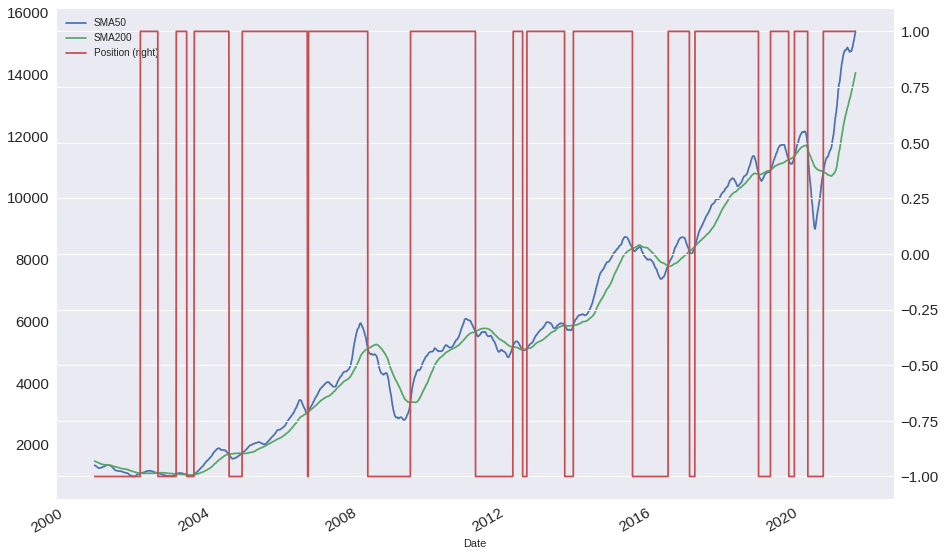

In [166]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15,10), secondary_y = "Position", fontsize = 15)
plt.show()

In [167]:
df["Strategy_Return"] = df["Position"].shift() * df["Return"]

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
train, test = train_test_split(df, test_size=0.10)

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [171]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [172]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [173]:
poly_features = poly.fit_transform(X_train.reshape(-1,1))

In [174]:
poly_features = poly.fit_transform(X_train.reshape(-1,1))

In [175]:
from pandas.core.common import random_state
model = LinearRegression()
svr_poly = SVR(kernel="rbf", C=100, gamma="auto")
#model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
# Fit linear model using the train data set
model.fit(poly_features, y_train)
fitting = model.predict(poly_features)
#model_rf.fit(X_train, y_train)
fitting

array([ 3249.3216321 , 12353.2249852 ,  2404.85246558, ...,
        2369.01862338,  1749.95112823,  4502.30418869])

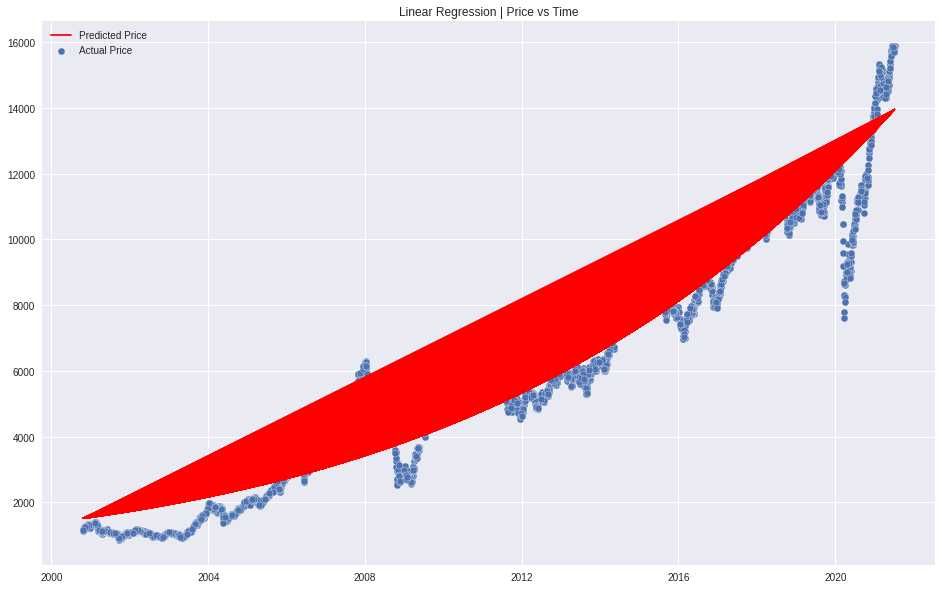

In [176]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, fitting, color='r', label='Predicted Price')
plt.legend()
plt.show()

In [177]:
data

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94
...,...,...,...,...,...,...,...,...,...
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,1.735997e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,28.53,4.27,1.23


In [182]:
df = data
df = df.reset_index()

In [183]:
df = df.drop(['Date', 'P/E', 'P/B',	'Div Yield', 'Turnover'], axis =1)
df

,Open,High,Low,Close,Volume
0,1482.15,1592.90,1482.15,1592.20,25358322
1,1594.40,1641.95,1594.40,1638.70,38787872
2,1634.55,1635.50,1555.05,1595.80,62153431
3,1595.80,1639.00,1595.80,1617.60,51272875
4,1616.60,1628.25,1597.20,1613.30,54315945
...,...,...,...,...,...
5348,15755.05,15755.55,15667.05,15680.00,224921644
5349,15705.85,15738.35,15635.95,15722.20,254808999
5350,15793.40,15845.95,15762.05,15834.35,207032153
5351,15813.75,15914.20,15801.00,15818.25,391410742


In [197]:
#ma100 = df.Close.rolling(100).mean
df["SMA50"] = df.Close.rolling(window = 100).mean()
df["SMA200"] = df.Close.rolling(window = 200).mean()

In [198]:
df_train = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
df_test = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [200]:
df_train_arr = scaler.fit_transform(df_train)

In [201]:
x_train = []
y_train = []
for i in range(100, df_train_arr.shape[0]):
  x_train.append(df_train_arr[i-100: i])
  y_train.append(df_train_arr[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [202]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [204]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [206]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [208]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
114/114 [==============================] - 41s 309ms/step - loss: 0.0214
Epoch 2/50
114/114 [==============================] - 39s 346ms/step - loss: 0.0066
Epoch 3/50
114/114 [==============================] - 41s 358ms/step - loss: 0.0055
Epoch 4/50
114/114 [==============================] - 35s 304ms/step - loss: 0.0051
Epoch 5/50
114/114 [==============================] - 35s 303ms/step - loss: 0.0047
Epoch 6/50
114/114 [==============================] - 34s 301ms/step - loss: 0.0041
Epoch 7/50
114/114 [==============================] - 35s 305ms/step - loss: 0.0037
Epoch 8/50
114/114 [==============================] - 35s 306ms/step - loss: 0.0036
Epoch 9/50
114/114 [==============================] - 35s 308ms/step - loss: 0.0036
Epoch 10/50
114/114 [==============================] - 35s 306ms/step - loss: 0.0035
Epoch 11/50
114/114 [==============================] - 37s 320ms/step - loss: 0.0033
Epoch 12/50
114/114 [==============================] - 35s 308ms/step - lo

In [209]:
model.save('keras_model.h5')

In [210]:
past_100 = df_train.tail(100)

In [211]:
final_df = past_100.append(df_test, ignore_index=True)

In [212]:
input_df = scaler.fit_transform(final_df)

In [213]:
x_test = []
y_test = []
for i in range(100, input_df.shape[0]):
  x_test.append(input_df[i-100: i])
  y_test.append(input_df[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [214]:
y_pred = model.predict(x_test)

51/51 [==============================] - 6s 91ms/step


In [215]:
scaler.scale_

array([0.00011225])

In [216]:
scale_fac = 1/0.00011225
y_pred = y_pred* scale_fac
y_test = y_test * scale_fac

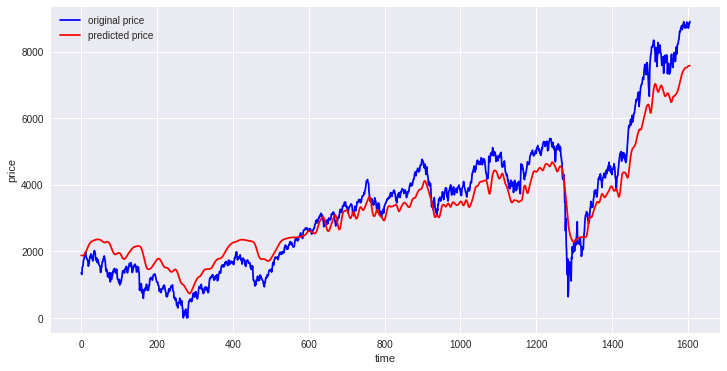

In [217]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='original price')
plt.plot(y_pred, 'r', label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()